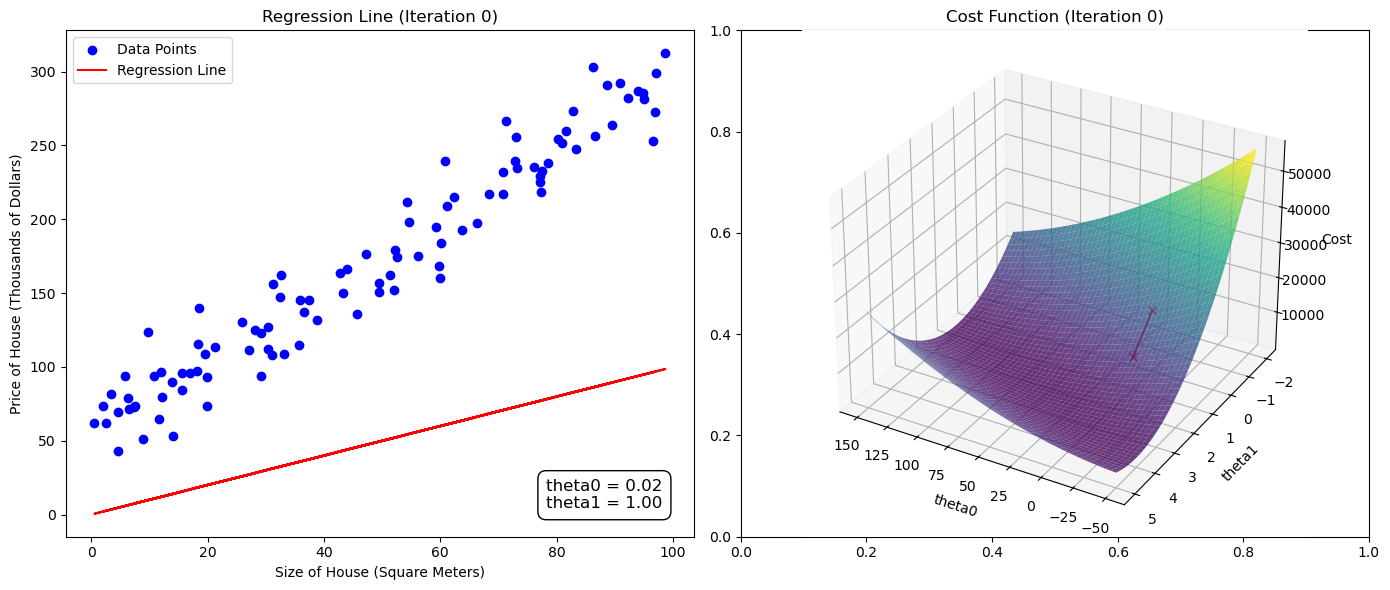

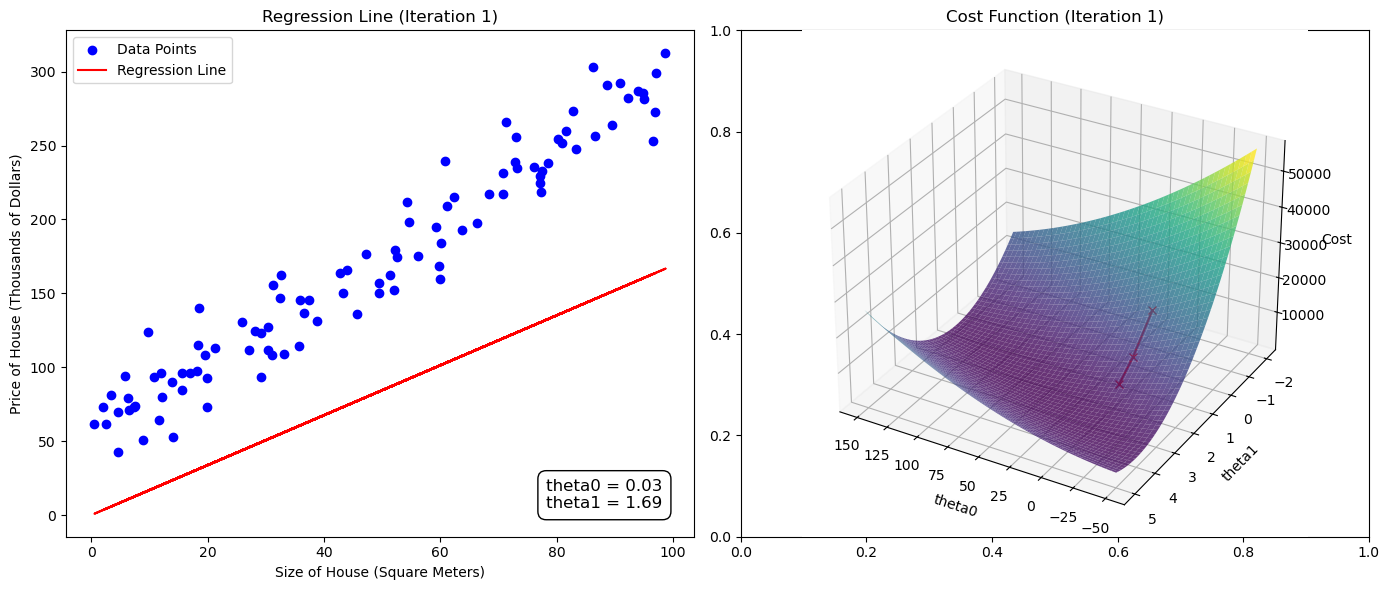

KeyboardInterrupt: 

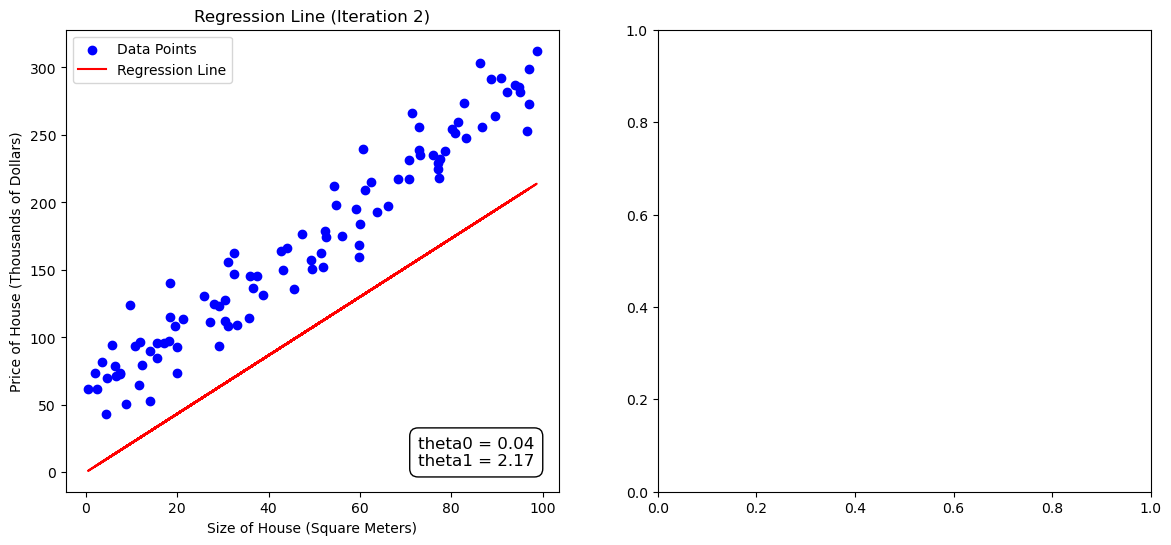

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate synthetic data
def generate_synthetic_data(num_points=100):
    np.random.seed(42)
    X = np.random.rand(num_points, 1) * 100  # House sizes
    y = 2.5 * X + np.random.randn(num_points, 1) * 20 + 50  # House prices with some noise
    return X, y

# Function to compute the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = [theta.flatten()]
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (learning_rate / m) * X.T.dot(errors)
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.flatten())  # Store theta as a flattened 1D array
        
        # Visualize the line and the cost function at each step in a single figure with two subplots
        if i % 1 == 0:
            plot_combined_graphs(X[:, 1], y, theta, theta_history, cost, i)
    
    return theta, cost_history, theta_history

# Function to plot the data and regression line, and cost function in one figure
def plot_combined_graphs(X, y, theta, theta_history, current_cost, iteration):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left subplot: Regression line
    axs[0].scatter(X, y, color='blue', label='Data Points')
    axs[0].set_xlabel('Size of House (Square Meters)')
    axs[0].set_ylabel('Price of House (Thousands of Dollars)')
    
    # Plot the regression line
    y_pred = X * theta[1] + theta[0]
    axs[0].plot(X, y_pred, color='red', label='Regression Line')
    axs[0].set_title(f"Regression Line (Iteration {iteration})")
    
    # Annotate theta0 and theta1 on the plot
    axs[0].text(0.95, 0.05, f"theta0 = {theta[0][0]:.2f}\ntheta1 = {theta[1][0]:.2f}", 
               transform=axs[0].transAxes, fontsize=12, verticalalignment='bottom',
               horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white"))
    
    axs[0].legend(loc='upper left')
    
    # Right subplot: 3D cost function
    theta0_vals = np.linspace(-50, 150, 200)  # Expanded range for better visibility
    theta1_vals = np.linspace(-2, 5, 200)  # Expanded range for better visibility
    cost_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array([theta0_vals[i], theta1_vals[j]])
            cost_vals[i, j] = compute_cost(np.c_[np.ones(X.shape), X], y, t.reshape(-1, 1))

    theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
    
    ax3d = fig.add_subplot(122, projection='3d')
    ax3d.plot_surface(theta0_vals, theta1_vals, cost_vals.T, cmap='viridis', alpha=0.8)
    
    # Plot the path of gradient descent
    theta_hist = np.array(theta_history)
    ax3d.plot(theta_hist[:, 0], theta_hist[:, 1], 
              np.array([compute_cost(np.c_[np.ones(X.shape), X], y, th.reshape(-1, 1)) for th in theta_hist]), 
              'r-', marker='x')
    
    ax3d.set_xlabel('theta0')
    ax3d.set_ylabel('theta1')
    ax3d.set_zlabel('Cost')
    ax3d.set_title(f'Cost Function (Iteration {iteration})')
    ax3d.view_init(elev=30, azim=120)  # Adjusted viewing angle for better visibility
    
    plt.tight_layout()
    plt.show()

# Generate synthetic data
X_raw, y = generate_synthetic_data(num_points=100)

# Add a column of ones to X to account for theta_0 (intercept)
X = np.c_[np.ones((X_raw.shape[0], 1)), X_raw]

# Initial values of theta
theta = np.zeros((2, 1))

# Gradient Descent parameters
learning_rate = 0.0001
iterations = 20

# Perform Gradient Descent
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, iterations)
